In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

loan_data = pd.read_csv('./02-loan_data.csv')

df = loan_data.copy()
del df['customer_id']

columns_to_round = ['loan_amt_outstanding', 'total_debt_outstanding', 'income']
df[columns_to_round] = df[columns_to_round].apply(lambda x: x.round(2))

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
df.dtypes

credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

In [14]:
df.isnull().sum()

credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

Our data appears to have already been cleaned.

In [5]:
df_train.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
4495,0,3322.04,1783.15,53092.33,4,588,0
6470,4,2153.90,6022.02,25992.88,4,687,1
2221,0,3666.26,5253.54,71090.00,5,622,0
7686,1,4485.62,6886.23,80505.30,5,681,0
9419,1,7624.47,14607.81,111898.20,3,756,0


In [6]:
# pred
y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

## Model (to predict PD)

array([[<Axes: title={'center': 'credit_lines_outstanding'}>,
        <Axes: title={'center': 'loan_amt_outstanding'}>,
        <Axes: title={'center': 'total_debt_outstanding'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'years_employed'}>,
        <Axes: title={'center': 'fico_score'}>],
       [<Axes: title={'center': 'default'}>, <Axes: >, <Axes: >]],
      dtype=object)

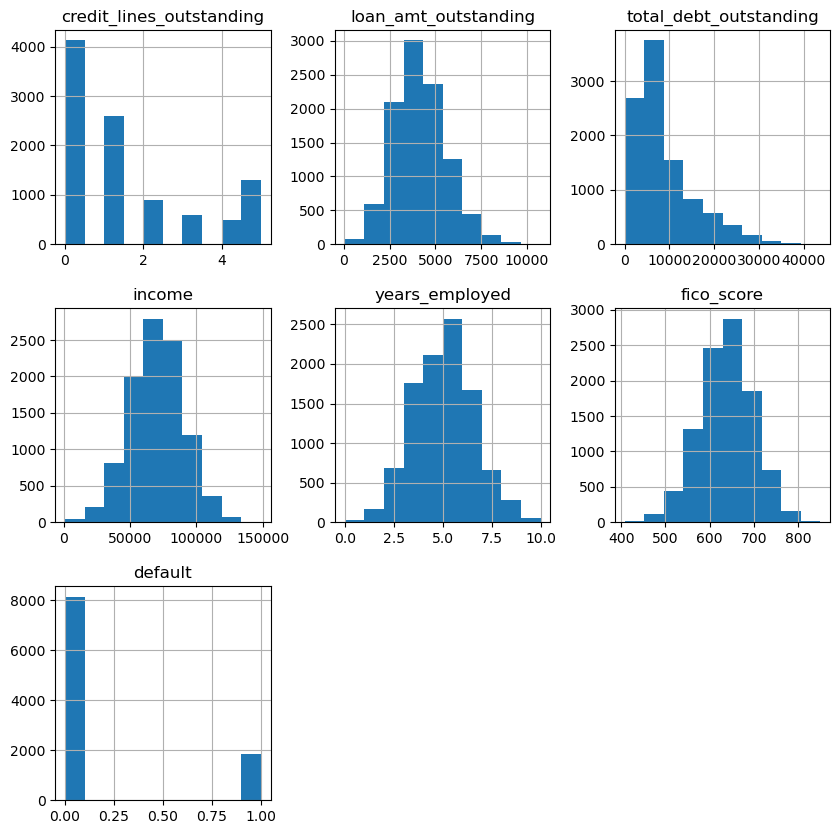

In [12]:
df.hist(figsize=(10,10))

In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. This appears to be the case in our data.

In [7]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_g = GaussianNB()
model_g.fit(df_train, y_train)

GaussianNB()

In [17]:
# Accuracy on the training set
(y_train== model_g.predict(df_train)).mean()

0.9723333333333334

In [19]:
# Accuracy on the validation set, to see if it needs tuning
(y_val== model_g.predict(df_val)).mean()

0.966

We get $96.6\%$ accuracy on the validation set. It looks like we don't need to tune the model. 

In [20]:
# Accuracy on the test set:
(y_test== model_g.predict(df_test)).mean()

0.9685

In [26]:
df_full = loan_data.copy()
del df_full['customer_id']
y_fulltrain = df_full.default.values
del df_full['default']

In [42]:
df_full.columns

Index(['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score'],
      dtype='object')

In [70]:
def prompt_user():
    data = {}
    data['credit_lines_outstanding'] = float(input("Enter the number of credit lines outstanding: "))
    data['loan_amt_outstanding'] = float(input("Enter the amount of loan outstanding: "))
    data['total_debt_outstanding'] = float(input("Enter the total debt outstanding: "))
    data['income'] = float(input("Enter the income: "))
    data['years_employed'] = float(input("Enter the number of years employed: "))
    data['fico_score'] = float(input("Enter the FICO score: "))

    return data

In [ ]:
# takes user input about the loan data
user_data = prompt_user()

This is the function that takes in the properties of a loan and outputs the expected loss

In [92]:
model = GaussianNB().fit(df_full, y_fulltrain)
# loan here is the loan profile dict
def expectedLoss():
    loan = pd.DataFrame(prompt_user(), index=[0])
    #return model.predict_proba(loan)[:,1][0]*100 + '\%'
    prob_default = model.predict_proba(loan)[:,1][0] 
    loan_amt = float(loan.loan_amt_outstanding)
    return prob_default * loan_amt * (1 - 0.1) # recovery rate = 10% (given)

In [93]:
expectedLoss()

/var/folders/h0/722z94dd3fb0pfv4wg3qmdkh0000gn/T/ipykernel_3994/2507886040.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  loan_amt = float(loan.loan_amt_outstanding)


0.5620931435410834